# 자료의 종류_결측값, 이상치 처리

# 데이터분석 순서(KDD 분석 방법론)
* 데이터 세트 선택: CSV, EXCEL, DB 에서 데이터를 읽어옴
* 데이터 전처리: 데이터타입, 결측값, 이상치탐지, 데이터분포분석, 상관관계
* 데이터 변환(특성추출): 원본 데이터에서 새로운 데이터 생성, 삭제, 스케일링, 구간화
* 데이터 마이닝(모델만들기, 분석): 분석에 적합한 알고리즘 선택, 모델 생성, 튜닝
* 결과 평가: 테스트 데이터를 이용해서 데이터 마이닝으로 만든 모델의 성능 평가

# 데이터 전처리
* 데이터 타입 변환
* 결측치 탐지 및 보간
* 이상치 탐지 및 처리
* 데이터 특성 파악(치우침, 분포 특성)
* 변수들 간의 상관관계 분석

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 1. 데이터 세트 선택 및 로딩

In [11]:
data = pd.read_csv("./data/Titanic_train.csv")
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [12]:
data.info() # 숫자에 차이가 있으면 결측이 있다는 것이다.

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [13]:
data.describe() # 이상값을 찾을 때 많이 사용한다. (이상값: 평균에서 많이 떨어진 값)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
data.describe(include='all') 

# 범주형 포함하고 싶을 때

# SibSp, Parch => '명목척도'라고 보면된다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 4. 결측값 찾고, 비율 보고, 대치 / 삭제하기
* 결측값 비율 계산: isna().sum() / len(데이터프레임) * 100
* 결측값 비율이 5% 미만: 행을 제거, 분석에 크게 영향을 미치지 않음
* 결측값 비율이 5% ~ 30%: 결측값을 대체(Imputation)
* 수치형 데이터(숫자형, 나이, 가격): 평균(mean), 중앙값(median), 최빈값(mode)으로 대체
* 범주형 데이터(문자형/(숫자형), 선실등급, 탑승지: 최빈값(mode)으로 대체
* 결측값 비율이 30% ~ 50%: 컬럼의 중요도에 따라서 결측값을 대체 혹은 삭제
* KNN(K-Nearest Neighbor, 최근접이웃) imputer, 회귀분석을 통해 결측값 대체
* 결측값 비율이 50% 이상: 해당 컬럼 삭제

In [15]:
# 결측값 비율 구하기
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# 결측 데이터의 종류
* MCAR(완전 무작위 결측): 다른 변수와 무관하게 생긴 결측(랜덤, 이유 없음)
    * 설문 조사중 일부 응답자가 무작위로 답변을 건너뜀
* MAR(무작위 결측): 다른 변수와는 관련 있지만 본인과는 무관
    * 나이가 많은 사람들이 소득란에 응답을 하지 않는 경우(나이와 관련)
    * 직업에 따라서 학력란에 응답하지 않는 경우(가정환경, 소득)
* NMAR(비무작위 결측): 변수 자기 자신과 직접 관련이 있는 경우
    * 소득이 낮은 사람이 자신의 소득을 숨기는 경우(소득과 결측이 직접 관련)
    * 체중이 많이 나가는 경우 자신의 체중을 숨기는 경우
    * 만족도가 낮은 고객이 만족도 조사에 응하지 않는 경우

# 결측치 처리방법
## 1) 단순대치법(simple imputaion)
#### (1) 완전분석: 결측값이 있는 모든 행을 삭제하고 완전한 자료만으로 분석(잘 안씀)
* 결측값을 삭제해도 모델을 만들기에 충분히 많은 데이터가 있는 경우
* 결측값을 삭제한 후에 데이터에 편향이 없다는 전제가 있을 때
* dropna(): 결측값이 있는 모든 행 삭제

In [14]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [16]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### (2) 평균 대치법: 결측치가 있는 컬럼에서 데이터의 평균을 구한 후 결측값을 대치
* 평균을 이용하기 때문에 간편
* 데이터에 이상치가 있을 경우 평균을 이용할 수 없다.
* 데이터에 이상치가 있는 경우 중앙값이나 최빈값을 이용해야 한다.

In [17]:
a = pd.Series([24,5,10,34,20,18,28,25, 23])
b = pd.Series([24,5,10,34,20,18,28,2000, 23])

In [18]:
print(f"a의 평균 {a.mean()}")
print(f"b의 평균 {b.mean()}")

a의 평균 20.77777777777778
b의 평균 240.22222222222223


In [19]:
print(sorted(a))
print(sorted(b))

[5, 10, 18, 20, 23, 24, 25, 28, 34]
[5, 10, 18, 20, 23, 24, 28, 34, 2000]


In [20]:
# 이상치에 영향을 받지 않는다.
print(f"a의 중앙값 {a.median()}")
print(f"b의 중앙값 {b.median()}")

a의 중앙값 23.0
b의 중앙값 23.0


* Age 컬럼의 결측값을 평균 3대치법으로 대치

In [21]:
age_na_idx = data[data['Age'].isna()].index

In [24]:
age_na = data.loc[age_na_idx].copy()
age_na

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [25]:
age_na['Age'] = age_na['Age'].fillna(data['Age'].mean())

In [26]:
age_na

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


* 중앙값 median으로 대치

In [28]:
age_na2 = data.loc[age_na_idx]

In [29]:
age_na2['Age'].fillna(data['Age'].median())
age_na2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [33]:
embarked_na = data[data['Embarked'].isna()].copy()
embarked_na

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [34]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [35]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: str

In [31]:
data['Embarked'].mode()[0]

'S'

In [36]:
# 최빈값 mode사용
embarked_na['Embarked'] = embarked_na['Embarked'].fillna(data['Embarked'].mode()[0])

In [37]:
embarked_na

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


# Scikit-learn의 simple imputer를 이용한 대치

In [40]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------- -------------------- 3.9/8.1 MB 19.5 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 20.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 17.9 MB/s  0:00:00
   ---------------------------------------- 0.0/36.4 MB ? eta -:--:--
   ----- ---------------------------------- 4.7/36.4 MB 21.8 MB/s eta 0:00:02
   ----------- ---------------------------- 10.7/36.4 MB 25.8 MB/s eta 0:00:01
   ---------------- ----------------------- 14.9/36.4 MB 24.1 MB/s eta 0:00:01
   ----------------------- ---------------- 21.2/36.4 MB 25.8 MB/s eta 0:00:01
   ------------------------------ --------- 27.8/36.4 MB 26.7 MB/s eta 0:00:01
   ------------------------------------- -- 34.1/36.4 MB 27.1 MB/s eta 0:00:01
   ---------------------------------------  36.2/36.4 MB 27.4 MB/s eta 0:00:01
   ---------------------------------------- 36.4/36.4 MB 22.9 MB/s  0:00:01

   -

In [5]:
from sklearn.impute import SimpleImputer

In [38]:
imp_mean = SimpleImputer(strategy='mean')

In [39]:
data2 = data.copy()
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
data[data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [41]:
age_na_3 = data[data['Age'].isna()].copy()
age_na_3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [42]:
age_na_3[['Age']].shape

(177, 1)

In [43]:
imp_mean.fit_transform(age_na_3['Age'])

ValueError: Expected a 2-dimensional container but got <class 'pandas.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [44]:
imp_mean.fit_transform(age_na_3[['Age']]) #2차원 데이터로 만들어야 한다. []

C:\Users\Admin\miniforge3\envs\fintech\Lib\site-packages\sklearn\impute\_base.py:641: UserWarning: Skipping features without any observed values: ['Age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


array([], shape=(177, 0), dtype=float64)

In [ ]:
data

In [ ]:
data2[['Age']].shape

In [ ]:
imp_mean.fit_transform(data2[['Age']]) # 2차원의 데이터 프레임 형태로 나온다.

In [ ]:
data2['Age'] = imp_mean.fit_transform(data2[['Age']])[:,0]

In [54]:
data2['Age'] = imp_mean.fit_transform(data2[['Age']])
data2

NameError: name 'data2' is not defined

In [57]:
data3 = data.copy()

In [58]:
data3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [59]:
data3.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [61]:
imp_median = SimpleImputer(strategy='median')
imp_median.fit_transform(data3[['Age']])

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [28.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [28.  ],
       [31.  ],
       [28.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [28.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [40.  ],
       [28.  ],
       [28.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [28.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [28.  ],
       [ 3.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [28.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [64]:
imp_median = SimpleImputer(strategy='median')
imp_median.fit_transform(data3[['Age']]).ravel() # 1차원으로 바뀐다.

array([22.  , 38.  , 26.  , 35.  , 35.  , 28.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 28.  ,
       31.  , 28.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 28.  ,
       19.  , 28.  , 28.  , 40.  , 28.  , 28.  , 66.  , 28.  , 42.  ,
       28.  , 21.  , 18.  , 14.  , 40.  , 27.  , 28.  ,  3.  , 19.  ,
       28.  , 28.  , 28.  , 28.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 28.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 28.  , 28.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 28.  , 28.  ,  0.83, 30.  , 22.  ,
       29.  , 28.  , 28.  , 17.  , 33.  , 16.  , 28.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 28.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 28.  , 21.  , 33.  , 37.  , 28.  , 21.  , 28.  ,
       38.  , 28.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 28.  , 32.5 , 32.5 , 54.  , 12.  ,
       28.  , 24.  ,

In [66]:
data3['Age'].median()

np.float64(28.0)

In [65]:
imp_median = SimpleImputer(strategy='median')
data3['Age'] = imp_median.fit_transform(data3[['Age']]).ravel() # 1차원으로 바뀐다.
data3.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [67]:
data4 = data.copy()

In [68]:
imp_mode = SimpleImputer(strategy='most_frequent')
imp_mode.fit_transform(data4[['Embarked']]).flatten()

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'C', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S',
       'C', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'Q', 'C', 'S', 'S', 'S',
       'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C',
       'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'C', 'S',
       'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S

In [72]:
imp_mode = SimpleImputer(strategy='most_frequent')
data4['Embarked'] = imp_mode.fit_transform(data4[['Embarked']]).flatten()
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


# 결측값 비율이 30% ~ 50%일 때, KNN 최근접이웃법

# KNN = K - Nearest Neighbor(최근접이웃)

In [87]:
from sklearn.impute import KNNImputer

In [88]:
data5 = data.copy()

In [89]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [83]:
# 인스턴스 만들기
knn_imp = KNNImputer(n_neighbors=5)
knn_imp.fit_transform(data5[['Age']])[:,0]

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

In [91]:
# 인스턴스 만들기
knn_imp = KNNImputer(n_neighbors=20) # 주변의 몇 개의 데이터를 볼 것인가?
data5['Age']= knn_imp.fit_transform(data5[['Age']])[:,0]
data5.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q


# 이상치(outlier) 탐지 및 처리

# 이상값(outlier) 탐지
* 이상값: 데이터 집합에서 다른 값들과 뚜렷하게 다른 값
* 통계적으로 평균을 왜곡시킴, 모델의 결과를 왜곡시킬 수 있음
* 전체 데이터 분포에서 정상 범위에 속하지 않는 데이터

# 이상값 탐지 방법 3가지
* Z-score가 -3 ~ 3 범위를 넘어가는 경우: 극단적인 이상값을 탐지
* 평균을 기준으로 평균에서 ±(3*표준편차)를 넘는 경우: 표준편차가 큰 경우에는 잘 못잡음
* IQR(사분위수) 기준으로 계산한 상위 하위 이상값을 넘는 경우: 정규·비정규분포에서 모두 강함

# 1) Z-score로 이상값 탐지하기
* z-score: (값 - 평균) / 표준편차
* 평균: .mean()
* 표준편차: .std()

* Fare 컬럼의 Z-score 구학기

In [95]:
data.descirbed()

AttributeError: 'DataFrame' object has no attribute 'descirbed'

In [96]:
# 평균과 표준편차를 구해서 z-score 계산하기
# z-score = (값 - 평균) / 표준편차

In [97]:
fare_mean = data['Fare'].mean()
fare_mean

np.float64(32.204207968574636)

In [99]:
# 표준편차
data['Fare'].std()

np.float64(49.6934285971809)

In [100]:
# 표준편차
fare_std = data['Fare'].std()
fare_std

np.float64(49.6934285971809)

In [98]:
data['Fare'] - fare_mean

0     -24.954208
1      39.079092
2     -24.279208
3      20.895792
4     -24.154208
         ...    
886   -19.204208
887    -2.204208
888    -8.754208
889    -2.204208
890   -24.454208
Name: Fare, Length: 891, dtype: float64

In [102]:
data['z_score'] = (data['Fare'] - fare_mean) / data['Fare']

In [103]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z_score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-3.441960
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.548222
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-3.063622
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.393518
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-3.000523
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,-1.477247
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,-0.073474
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,-0.373314
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,-0.073474


* scipy.stats.zscore 이용해 zscore 계산하기

In [48]:
from scipy.stats import zscore

In [50]:
data[(data['z_score'] < -3) | (data['z_score'] > 3)]

KeyError: 'z_score'

In [ ]:
data[data['z_score2']]

In [4]:
# 이상치를 발견할 경우 원인파악부터 진행 해야 한다.

## 2) 평균과 표준편차를 이용해 이상값 찾기 ESD(Extreme Studentized Deiation)
평균±(3표준편차) $ ({\mu\pm 3 \sigma}) $


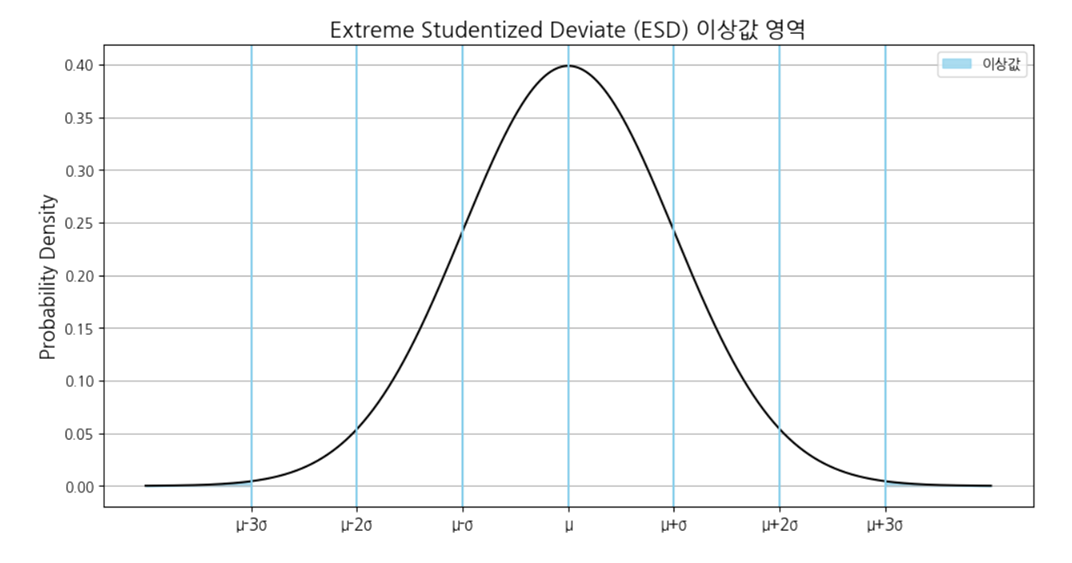

In [51]:
data['Fare'].std()

np.float64(49.6934285971809)

In [52]:
data['Fare'].mean()

np.float64(32.204207968574636)

In [54]:
data['Fare'].mean() + data['Fare'].std()

np.float64(81.89763656575553)

In [56]:
data['Fare'].mean() + data['Fare'].std() + data['Fare'].std() + data['Fare'].std()

np.float64(181.28449376011736)

In [57]:
fare_mean

NameError: name 'fare_mean' is not defined

In [58]:
data['Fare'].std()

np.float64(49.6934285971809)

In [ ]:
lower_bound = fare_mean - (3* data['Fare'].std())
upper_bound = fare_mean + (3* data['Fare'].std())
print('lower_bound')

# 3) IQR(사분위수)를 이용한 이상값 탐지
## (1) IQR 이란?
* IQR은 데이터의 중간 50% 구간의 길이를 의미
* IQR은 0, 25, 50, 75, 100
* IQR공식: Q3(75%) - Q1(25%)

## (2) IQR로 이상값을 찾는 이유?
* 평균과 표준편차는 극단적인 값에 민감
* IQR은 중간값 기반이라 극단값(outlier)에 영향을 덜 받음
* 정규분포가 아닌 데이터에서도 이상치를 잘 찾을 수 있음

## (3) IQR 기반 이상값 판정 기준
* 하한값: Q1(25%) - (1.5 * (Q3(75%)-Q1(25%))
* 상한값: Q3(75%) + (1.5 * (Q3(75%)-Q1(25%))

In [59]:
data.describe() # 각 컬럼의 사분위수를 뽑아준다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,z_score2
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,3.987333e-18
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.000562e+00
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,-6.484217e-01
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,-4.891482e-01
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,-3.573909e-01
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,-2.424635e-02
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,9.667167e+00


In [62]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [66]:
iqr_lower_bound = 7.910400 - (1.5 * (31.000000 - 7.910400))
iqr_upper_bound = 31.000000 + (1.5 * (31.000000 - 7.910400))
print('iqr_lower_bound: ',iqr_lower_bound, 'iqr_upper_bound :',iqr_upper_bound)

iqr_lower_bound:  -26.724 iqr_upper_bound : 65.6344


In [67]:
data_desc = data.describe()
data_desc

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,z_score2
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,3.987333e-18
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.000562e+00
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,-6.484217e-01
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,-4.891482e-01
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,-3.573909e-01
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,-2.424635e-02
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,9.667167e+00


In [69]:
data_desc.loc['75%', :] # 전체에서 75%에 해당하는 것 불러오기

PassengerId    668.500000
Survived         1.000000
Pclass           3.000000
Age             38.000000
SibSp            1.000000
Parch            0.000000
Fare            31.000000
z_score2        -0.024246
Name: 75%, dtype: float64

In [70]:
data_desc.loc['75%'] + (1.5 * (data_desc.loc['75%'] - data_desc.loc['25%'])) # 브로드캐스팅이 되기 때문에 이렇게 계산이 가능하다.

PassengerId    1336.000000
Survived          2.500000
Pclass            4.500000
Age              64.812500
SibSp             2.500000
Parch             0.000000
Fare             65.634400
z_score2          0.673106
dtype: float64

# 상자수염그림(boxplot)을 이용해서 컬럼의 이상치 여부 판단하기

<Axes: >

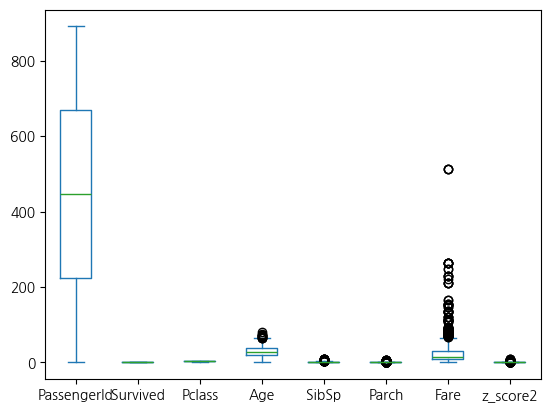

In [72]:
data.plot(kind='box') # 동그라미가 있는 영역이 이상치이다.

In [73]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'z_score2'],
      dtype='str')

In [76]:
data.select_dtypes(exclude="str") # 문자타입을 제거, 숫자로된 것들만 나온다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,z_score2
0,1,0,3,22.0,1,0,7.2500,-0.502445
1,2,1,1,38.0,1,0,71.2833,0.786845
2,3,1,3,26.0,0,0,7.9250,-0.488854
3,4,1,1,35.0,1,0,53.1000,0.420730
4,5,0,3,35.0,0,0,8.0500,-0.486337
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,-0.386671
887,888,1,1,19.0,0,0,30.0000,-0.044381
888,889,0,3,NaN,1,2,23.4500,-0.176263
889,890,1,1,26.0,0,0,30.0000,-0.044381


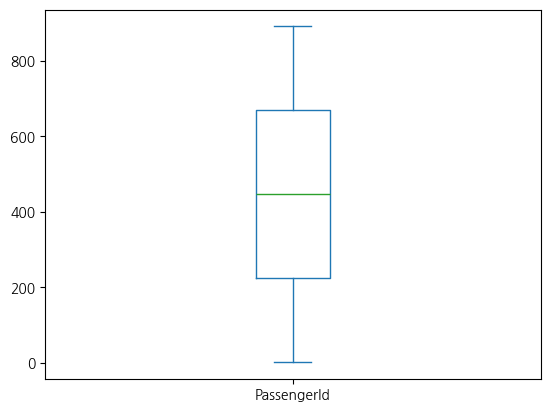

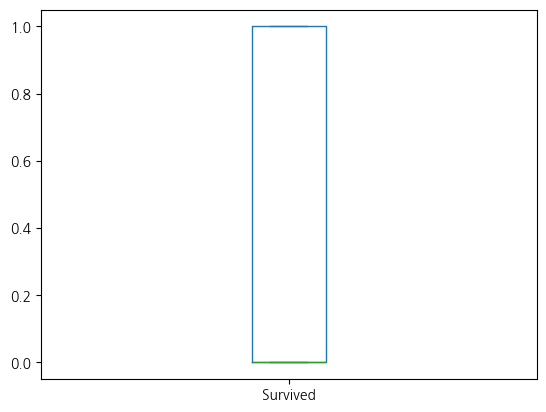

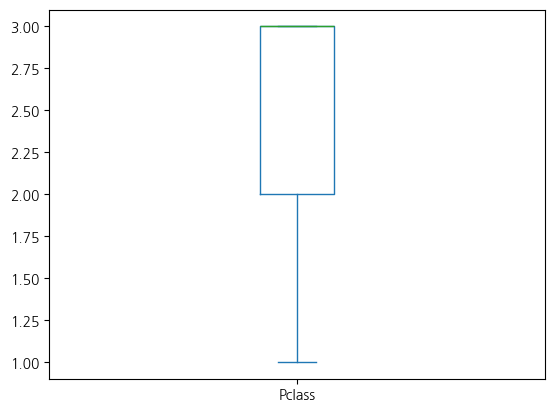

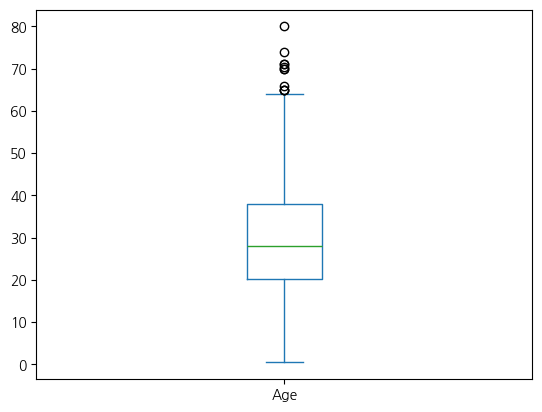

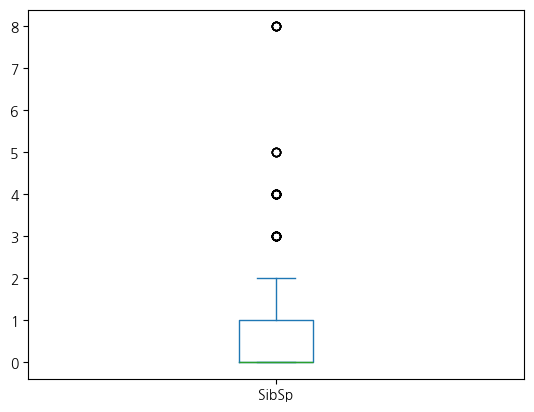

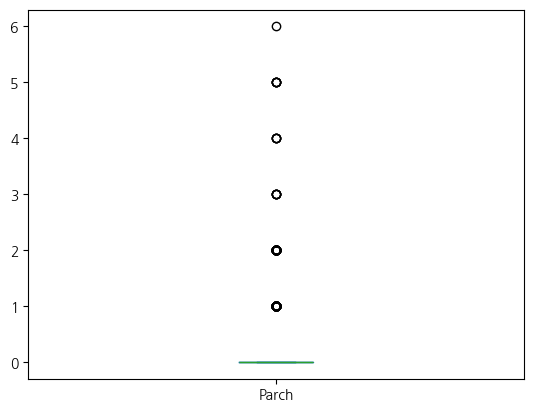

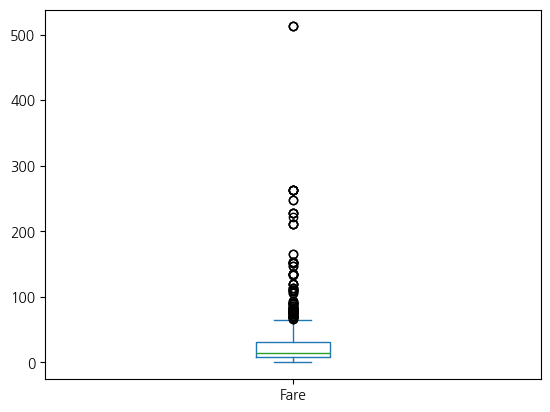

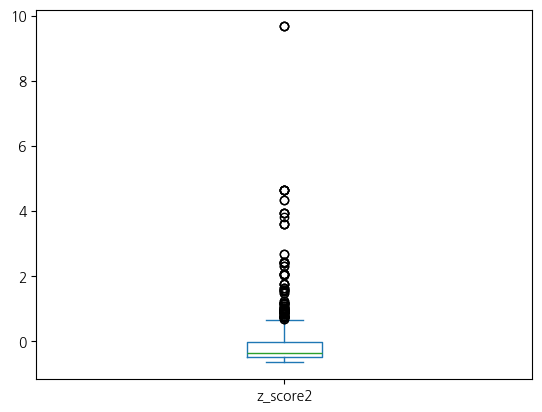

In [77]:
for col in data.select_dtypes(exclude="str").columns:
    data[col].plot(kind='box')
    plt.show()

# 이상치 처리 방법 6가지  
| 방법 | 설명 | 주의사항 |
|:----|:----|:----|
| 1. 삭제 (제거) | 이상치인 행(row) 삭제 | 데이터 수가 많을 때만 추천 |
| 2. 대체 (수정) | 평균, 중앙값 등으로 이상치 값을 대체 | 대체 값이 데이터의 특성을 망가뜨릴 수 있음 |
| 3. 변환 | 로그(log), 루트(sqrt) 변환해서 이상치 영향을 줄이기 | 주로 오른쪽으로 긴 분포(Skewed Data) |
| 4. 구간 압축 (Winsorization) | 상/하위 극단값을 일정 값으로 '컷' | 통계 왜곡 최소화할 때 사용 |
| 5. 모델링 시 Robust 방법 사용 | 이상치에 강한 모델 사용 (예: RobustScaler, RANSAC) | 이상치를 제거하지 않고 대응 |
| 6. 별도 분석 | 이상치만 따로 분석해서 인사이트 얻기 | 이상치가 중요한 의미를 가질 때 |